In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Text(0, 0.5, 'Sales')

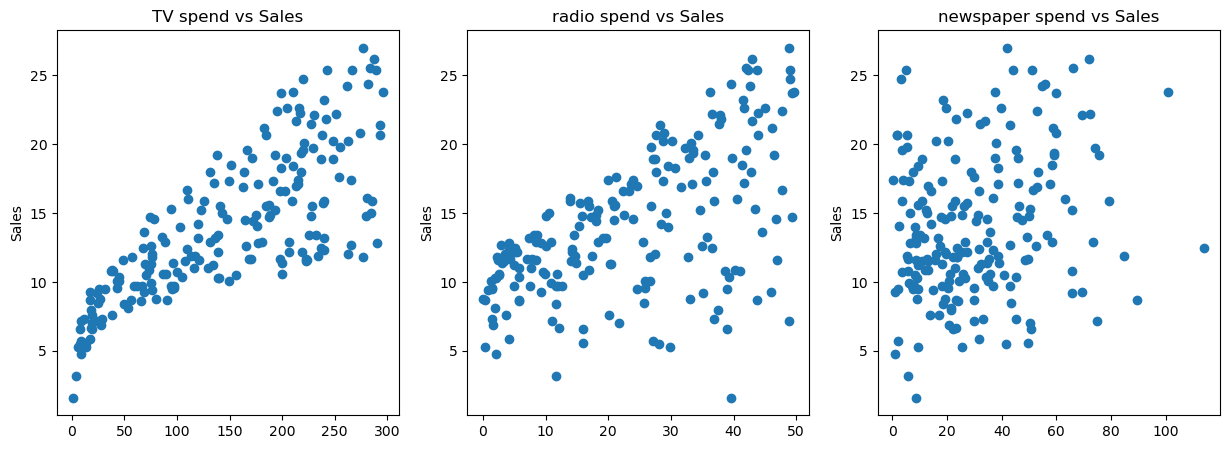

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

axes[0].plot(df['TV'],df['sales'], 'o')
axes[0].set_title('TV spend vs Sales')
axes[0].set_ylabel('Sales')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('radio spend vs Sales')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('newspaper spend vs Sales')
axes[2].set_ylabel('Sales')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

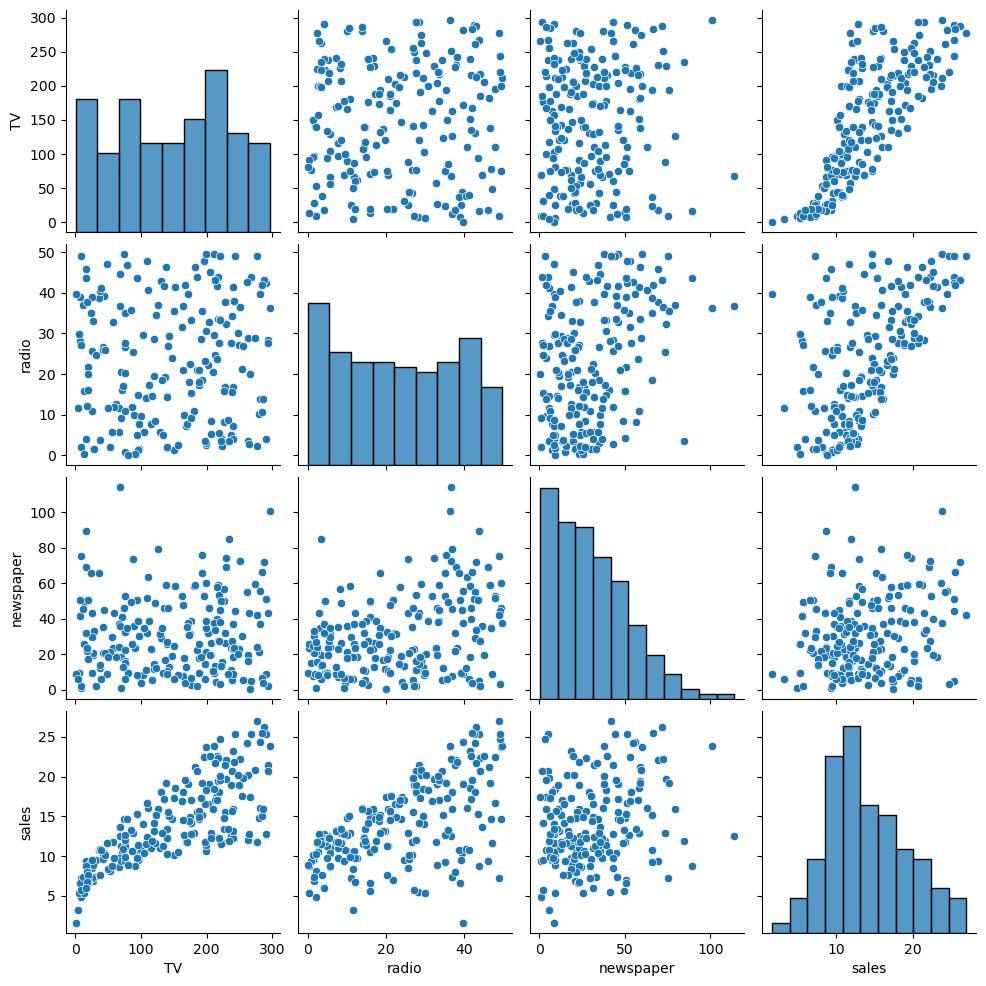

In [5]:
sns.pairplot(df)

#### Separating features and label

In [6]:
X = df.drop('sales',axis=1)

y = df['sales']

###### Train | Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [8]:
X_train

,TV,radio,newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [9]:
y_train

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: sales, Length: 140, dtype: float64

In [10]:
X_test.shape

(60, 3)

###### Creating a Model (Estimator)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#help(LinearRegression)

In [13]:
#Creating the instance of the model
mod = LinearRegression()

In [14]:
#Train your model on training data. Make sure that you fit to the training data only
mod.fit(X_train,y_train)

LinearRegression()

In [15]:
#Predict the X_test
y_pred = mod.predict(X_test)

In [16]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    19.0
115    12.6
64     18.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: sales, dtype: float64

###### Understanding and Utilising the Model

In [17]:
df['sales'].mean()

14.0225

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MAE

1.0638483124072033

In [19]:
MSE = mean_squared_error(y_test,y_pred)
MSE

1.8506819941636976

In [20]:
RMSE = np.sqrt(MSE)
RMSE

1.3603977338130557

In [21]:
1.36/14

0.09714285714285716

#### Residuals

In [22]:
y_pred = mod.predict(X_test)
y_res = y_test - y_pred

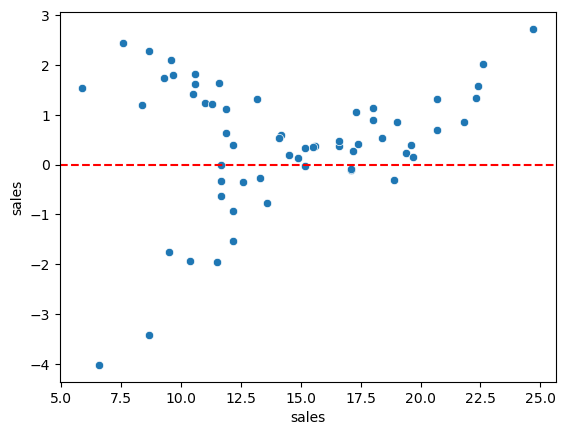

In [26]:
sns.scatterplot(x=y_test,y=y_res)
plt.axhline(y=0,color='red',ls='--')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


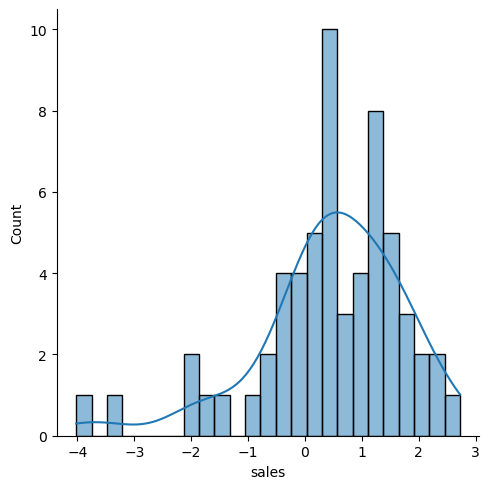

In [28]:
sns.displot(y_res, bins=25, kde = True)

###### Retraining Model on full data

In [29]:
final_model = LinearRegression()

In [30]:
final_model.fit(X,y)

LinearRegression()

#### Deployment, Predictions and Model Attributes

In [31]:
y_hat = final_model.predict(X)

Text(0, 0.5, 'Sales')

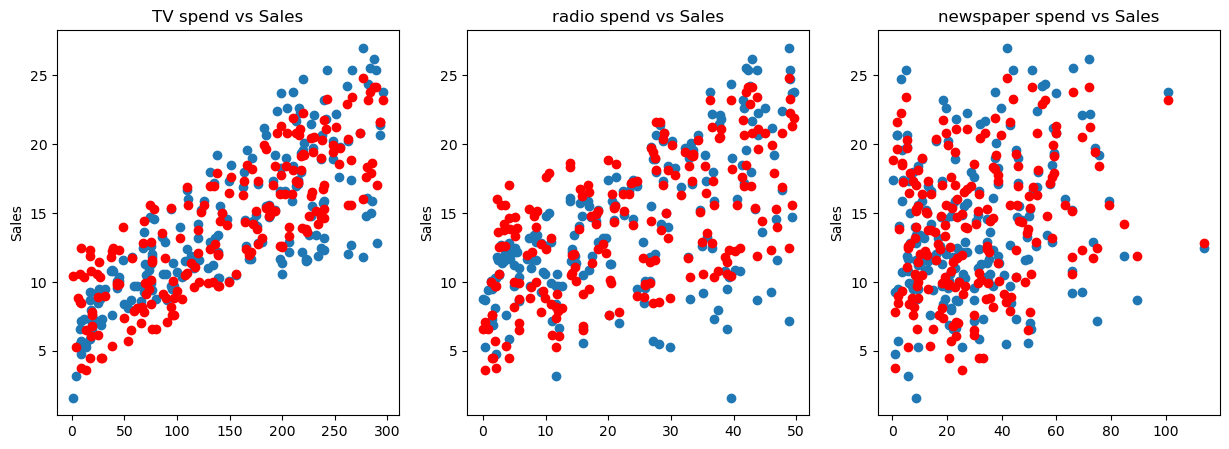

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

axes[0].plot(df['TV'],df['sales'], 'o')
axes[0].plot(df['TV'],y_hat,'o', color = 'red')
axes[0].set_title('TV spend vs Sales')
axes[0].set_ylabel('Sales')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o', color = 'red')
axes[1].set_title('radio spend vs Sales')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o', color = 'red')
axes[2].set_title('newspaper spend vs Sales')
axes[2].set_ylabel('Sales')

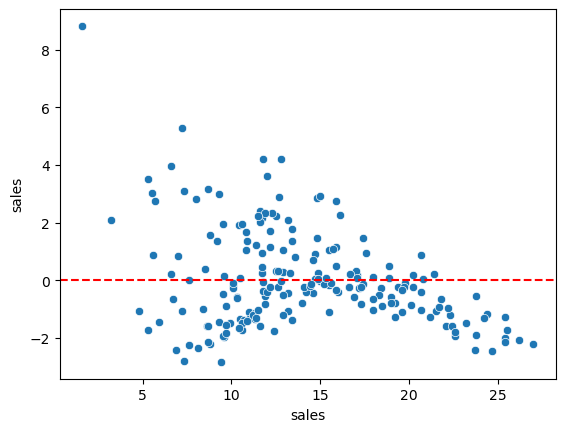

In [34]:
sns.scatterplot(x=y,y=(y_hat-y))
plt.axhline(y=0,color='red',ls='--')

In [35]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [36]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


###### Predcting new data

In [38]:
campaign = [[149,21,9], [149,21,10000]]
final_model.predict(campaign)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.70761446,  3.34202147])

###### Save and Load a Model

In [39]:
from joblib import dump, load

In [40]:
dump(final_model, 'sales_ml_model.joblib')

['sales_ml_model.joblib']

In [41]:
loaded_model = load('sales_ml_model.joblib')
loaded_model.predict([[198,342,8887]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67.25735429])